In [5]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor = conn.cursor()

sql="delete from product"
cursor.execute(sql)

items = [
(1, 'lemon', 1500, '레몬에 포함된 구연산은 피로회복에 좋습니다. 비타민 C도 풍부합니다.', 'lemon.jpg'),
(2, 'orange', 2000, '비타민 C가 풍부합니다. 생과일주스로 마시면 좋습니다.', 'orange.jpg'),
(3, 'kiwi', 3000, '비타민 C가 풍부합니다. 다이어트나 미용에 좋습니다.', 'kiwi.jpg'),
(4, 'grape', 5000, '폴리페놀을 다량 함유하고 있어 항산화 작용을 합니다.', 'grape.jpg'),
(5, 'strawberry', 8000, '비타민 C나 플라보노이드를 다량 함유하고 있습니다.', 'strawberry.jpg'),
(6, 'Mandarin', 7000, '시네피린을 함유하고 있어 감기 예방에 좋다고 합니다.', 'mandarin.jpg'),
]

In [6]:
for row in items:
    sql = 'insert into product values (:1,:2,:3,:4,:5)'
    cursor.execute(sql,row)
sql = 'select count(*) from product'
cursor.execute(sql)
count=cursor.fetchone()
print('상품개수:',count[0])

상품개수: 6


In [7]:
#전체 레코드 조회
sql = "select * from product"
cursor.execute(sql)
for row in cursor:
    description=row[3].read()
    print(row)
    print(description)

(1, 'lemon', 1500, <cx_Oracle.LOB object at 0x0000026E008E4E40>, 'lemon.jpg')
레몬에 포함된 구연산은 피로회복에 좋습니다. 비타민 C도 풍부합니다.
(2, 'orange', 2000, <cx_Oracle.LOB object at 0x0000026E00921C00>, 'orange.jpg')
비타민 C가 풍부합니다. 생과일주스로 마시면 좋습니다.
(3, 'kiwi', 3000, <cx_Oracle.LOB object at 0x0000026E00921D50>, 'kiwi.jpg')
비타민 C가 풍부합니다. 다이어트나 미용에 좋습니다.
(4, 'grape', 5000, <cx_Oracle.LOB object at 0x0000026E009216F0>, 'grape.jpg')
폴리페놀을 다량 함유하고 있어 항산화 작용을 합니다.
(5, 'strawberry', 8000, <cx_Oracle.LOB object at 0x0000026E00921D50>, 'strawberry.jpg')
비타민 C나 플라보노이드를 다량 함유하고 있습니다.
(6, 'Mandarin', 7000, <cx_Oracle.LOB object at 0x0000026E009216F0>, 'mandarin.jpg')
시네피린을 함유하고 있어 감기 예방에 좋다고 합니다.


In [8]:
sql = 'delete from product where product_id=6'
cursor.execute(sql)

In [9]:
conn.commit()

In [11]:
sql = 'delete from product'
cursor.execute(sql)

In [12]:
sql="insert into product values (:1,:2,:3,:4,:5)"
cursor.executemany(sql, items)

In [13]:
sql='select * from product'
cursor.execute(sql)
rs=cursor.fetchall()
for row in rs:
    print(row)

(1, 'lemon', 1500, <cx_Oracle.LOB object at 0x0000026E00921D80>, 'lemon.jpg')
(2, 'orange', 2000, <cx_Oracle.LOB object at 0x0000026E00921A50>, 'orange.jpg')
(3, 'kiwi', 3000, <cx_Oracle.LOB object at 0x0000026E00921480>, 'kiwi.jpg')
(4, 'grape', 5000, <cx_Oracle.LOB object at 0x0000026E00921BD0>, 'grape.jpg')
(5, 'strawberry', 8000, <cx_Oracle.LOB object at 0x0000026E00814960>, 'strawberry.jpg')
(6, 'Mandarin', 7000, <cx_Oracle.LOB object at 0x0000026E00814C60>, 'mandarin.jpg')


In [14]:
conn.commit()
cursor.close()
conn.close()

In [3]:
import cx_Oracle
conn = cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor = conn.cursor()
sql='''
select s.majorno, mname, count(*)
from stud s, major m
where s.majorno=m.majorno
group by s.majorno, mname
order by s.majorno
'''

cursor.execute(sql)
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(101, '컴퓨터공학', 7)
(102, '데이터사이언스', 4)
(103, '소프트웨어공학', 1)
(201, '전자공학', 4)
(202, '기계공학', 2)
(301, '문헌정보학', 2)


In [5]:
x = list(range(1,7))
names=[]
y=[]
for row in rows:
    names.append(row[1])
    y.append(row[2])

print(x)
print(names)
print(y)

[1, 2, 3, 4, 5, 6]
['컴퓨터공학', '데이터사이언스', '소프트웨어공학', '전자공학', '기계공학', '문헌정보학']
[7, 4, 1, 4, 2, 2]


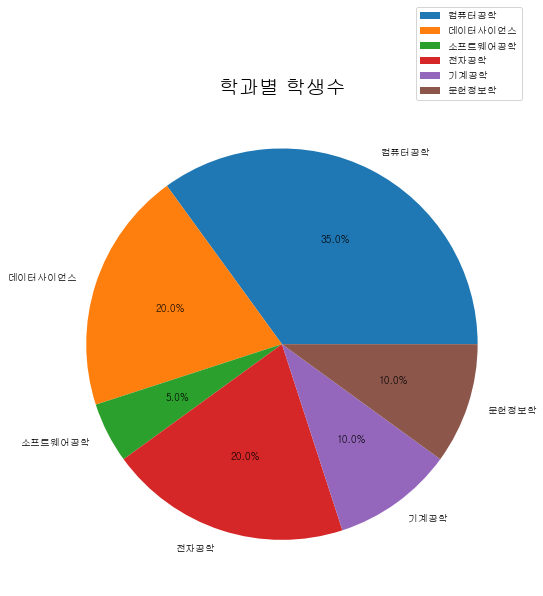

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(
    fname='c:/windows/fonts/gulim.ttc').get_name()

rc('font', family=font_name)
plt.rcParams['figure.figsize']=(16,9)
plt.title('학과별 학생수', fontsize=20) #제목
plt.pie(y,labels=names,autopct='%.1f%%') #파이차트
#plt.legend(names,loc='upper right') #범례
#bbox_to_anchor: figure의 width, height를 1.0을 기준으로 설정
#legend의 좌측상단좌표를 figure의 1.0, 1.0에 위치시킴
plt.legend(names,bbox_to_anchor=[1, 1.2])

In [2]:
import pandas as pd
df = pd.read_csv('c:/data/db/iris.csv') #csv 파일
df.head()#처음 5개의 데이터

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
import pandas as pd
df = pd.read_csv('c:/data/db/iris.csv') #csv 파일
df.head()#처음 5개의 데이터

from sqlalchemy import create_engine
import cx_Oracle
engine = create_engine('oracle+cx_oracle://hr:hr@xe')
conn=engine.connect()
#데이터프레임의 내용을 테이블로 저장
df.to_sql(name='iris', con=engine, if_exists='replace', index=False)
#df.to_sql(name='iris', con=engine, if_exists='replace')

InvalidRequestError: Could not reflect: requested table(s) not available in Engine(oracle+cx_oracle://hr:***@xe): (iris)

In [25]:
import cx_Oracle
conn = cx_Oracle.connect('java/java1234@localhost:1521/xe')

cursor = conn.cursor()
cursor.execute('select * from ontime where rownum < 5')

rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(2008, 1, 3, 4, '802', 750, '1001', 955, 'WN', '2272', 'N263WN', '119', '125', '104', '6', '12', 'JAX', 'IND', '688', '7', '8', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '1820', 1825, '1946', 1955, 'WN', '549', 'N363SW', '86', '90', '75', '-9', '-5', 'JAX', 'ORF', '543', '3', '8', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '821', 820, '953', 945, 'WN', '3604', 'N257WN', '92', '85', '80', '8', '1', 'JAX', 'ORF', '543', '3', '9', '0', None, '0', 'NA', 'NA', 'NA', 'NA', 'NA')
(2008, 1, 3, 4, '1734', 1650, '1941', 1905, 'WN', '23', 'N521SW', '127', '135', '113', '36', '44', 'JAX', 'PHL', '742', '4', '10', '0', None, '0', '3', '0', '0', '0', '33')


In [9]:
import cx_Oracle
conn=cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor = conn.cursor()
cursor.execute('''
select uniquecarrier, avg(depdelay)
from ontime
group by uniquecarrier
''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('AA', 16.135956458389142)
('AS', 7.852065938771141)
('WN', 11.817575933788843)
('UA', 15.590381469266925)
('FL', 9.638447545362439)
('MQ', 14.169342149180666)
('EV', 14.16328761785177)
('YV', 12.600623205657866)
('XE', 11.871840699928653)
('OO', 9.029531109107303)
('DL', 7.0524915521169405)
('B6', 12.549536126507341)
('CO', 13.858653006426048)
('HA', -1.3481437481437482)
('US', 6.590599131165372)
('F9', 6.680704041720991)
('OH', 10.826661523515629)
('AQ', -1.3902564102564103)
('9E', 13.068760355475222)
('NW', 8.603388391058655)


In [26]:
import cx_Oracle
conn=cx_Oracle.connect('java/java1234@localhost:1521/xe')
cursor = conn.cursor()
cursor.execute('''
select month, count(*)
from ontime
where year=2008 and arrdelay > 0
group by month
order by month
''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 279427)
(2, 278902)
(3, 294556)
(4, 256142)
(5, 254673)
(6, 295897)
(7, 264630)
(8, 239737)
(9, 169959)
(10, 183582)
(11, 181506)
(12, 280493)


In [27]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


<BarContainer object of 12 artists>

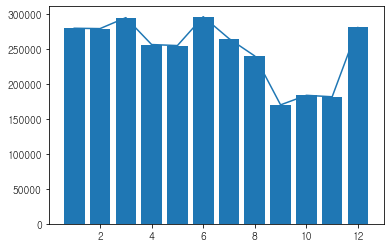

In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)

In [18]:
#요일별 평균 지연 시간
import cx_Oracle
conn = cx_Oracle.connect('hr/hr@localhost:1521/xe')

cursor = conn.cursor()
cursor.execute('''select dayofweek, avg(arrdelay)
from ontime
group by dayofweek''')
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 10.674828368079613)
(5, 13.569632084023631)
(7, 10.066904988028197)
(6, 7.471623989707134)
(2, 10.66795833359354)
(4, 9.869721631718638)
(3, 7.853225119565184)


In [19]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[10.674828368079613, 13.569632084023631, 10.066904988028197, 7.471623989707134, 10.66795833359354, 9.869721631718638, 7.853225119565184]


<BarContainer object of 7 artists>

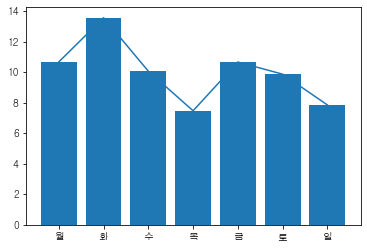

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font', family=font_name)

plt.plot(x,y)
plt.bar(x,y)

In [22]:
#시간대별(10월, 월요일)
import cx_Oracle
conn = cx_Oracle.connect('hr/hr@localhost:1521/xe')

cursor = conn.cursor()
cursor.execute('''
select *
from (
    select rownum as rn, a.*
    from(
        select CRSDepTime, avg(arrdelay) arrdelay
        from ontime
        where month = 10 and dayofweek = 1
        group by CRSDepTime
        order by arrdelay
    )A
) where rn between 1 and 5
''')

rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()